In [1]:
# to do
# 0. combine train and test set - done
# 1. canonicalize smiles from Molecule - done
# 2. standardise molecules - done
# 3. extract MorganFP - done
# 4. calculate rdkit descriptors - done
# 5. export pandas dataframe as .csv, split train, test back - done

In [2]:
# 2 csvs: Train and test - done
# Columns: smiles, (example_...), (ecfp_...), (rdkit_desc_...) - done
# Export csv to Temp

In [3]:
import pandas as pd
import numpy as np
from rdkit.Chem import AllChem
from rdkit.Chem import Descriptors

In [4]:
def rename(df_name, new_name):
    df = df_name
    for i in range(len(df_name.columns)):
        name = new_name + str(df_name.columns[i])
        df.rename(columns={df_name.columns[i] : name}, inplace=True)
    return df

In [5]:
# Reading data files

In [6]:
df = pd.read_csv("Data/train.csv")

In [7]:
df

,Id,smiles,sol_category
0,EOS12286,Cc1nc(N2CCN(C(=O)Nc3ccc(F)cc3F)CC2)cc(-n2ccnc2)n1,0
1,EOS85869,CCN(CC)[C@H]1CCN(C(=O)Cc2nc(C(C)C)c(C)s2)C1,0
2,EOS85435,CNC(=O)CNC(=O)c1c(-n2cccc2)sc(C)c1C,0
3,EOS102302,CC(C)(C)c1ccc(CSc2cnn(C(C)(C)C)c(=O)c2Cl)cc1,0
4,EOS64213,CC[C@H](NC(=O)c1ccnc(-n2ccnc2)c1)c1ccccc1OC,0
...,...,...,...
70706,EOS37839,O=C(NCCCc1nc(=O)[nH][nH]1)[C@H]1CCC(F)(F)C1,2
70707,EOS2088,Cc1ccc(C(=O)NC2CCCC2)cc1S(=O)(=O)N1CCOCC1,2
70708,EOS10587,COCCN1CCC(CN(C)S(=O)(=O)c2cccc(C(F)(F)F)c2)C1,2
70709,EOS40533,O=C(Nc1ccc(F)cc1)NC1CCN(C(=O)Cc2cnn(-c3ccccc3)...,2


In [8]:
df["sol_category"].value_counts()

2    65835
1     2835
0     2041
Name: sol_category, dtype: int64

In [9]:
example = pd.read_csv("Data/example_predictors.csv")

In [10]:
example

,Id,smiles,SlogP,SMR,LabuteASA,TPSA,AMW,ExactMW,NumLipinskiHBA,NumLipinskiHBD,...,VABC Volume Descriptor,Largest Chain,Largest Pi Chain,Petitjean Number,Lipinski's Rule of Five,Topological Polar Surface Area,Vertex adjacency information magnitude,XLogP,Zagreb Index,Rotatable Bonds Count (non terminal)
0,EOS2465,Cc1ccc(CN(C(=O)NCC(C)N2CCOCC2)C2CCCC2)s1,3.23142,102.1077,154.878833,44.81,365.543,365.213698,5,1,...,350.381172,7.0,5.0,0.461538,0.0,73.05,5.754888,1.287,126.0,6.0
1,EOS2466,O=C(NCC1CCCN(C(=O)Cc2cccs2)C1)c1ccc2nnnn2c1,1.39690,100.4422,159.722714,92.49,384.465,384.136845,8,1,...,318.736716,4.0,12.0,0.466667,0.0,120.73,5.906891,1.928,142.0,5.0
2,EOS2467,CO[C@@]12CC[C@H](Oc3ccccn3)C[C@@H]1N(Cc1cc(C3C...,3.27310,101.6217,159.819085,63.27,368.481,368.221226,6,1,...,336.575043,2.0,7.0,0.500000,0.0,63.27,5.954196,3.070,152.0,6.0
3,EOS2468,O=C(CC1C=CS(=O)(=O)C1)NCCCn1ncc2ccccc21,1.49100,88.3935,134.646129,81.06,333.413,333.114712,6,1,...,288.474069,6.0,9.0,0.500000,0.0,89.44,5.643856,1.617,120.0,6.0
4,EOS2469,Cc1cc2[nH]c(=O)[nH]c2c(NC(=O)c2ccc(S(C)(=O)=O)...,2.12884,95.8984,143.557043,111.89,359.407,359.093977,7,3,...,309.287363,3.0,22.0,0.500000,0.0,112.75,5.754888,1.615,136.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101013,EOS102460,NC(=O)CNCCC(c1ccccc1)c1ccccc1,2.28350,81.4081,119.364483,55.12,268.360,268.157563,3,3,...,268.403816,7.0,6.0,0.500000,0.0,55.12,5.392317,2.194,94.0,7.0
101014,EOS102461,NC(Cc1cc(O)c(O)cc1O)C(=O)O,-0.24220,50.7516,85.204577,124.01,213.189,213.063723,6,6,...,185.365920,4.0,9.0,0.500000,0.0,124.01,4.906891,-2.436,72.0,3.0
101015,EOS102462,CCn1c(-c2nonc2N)nc2ccccc21,1.68840,63.1114,97.015055,82.76,229.243,229.096360,6,2,...,176.998189,2.0,15.0,0.428571,0.0,82.76,5.247928,2.405,92.0,2.0
101016,EOS102463,Cn1c(CCCC(=O)O)nc2cc(N(CCCl)CCCl)ccc21,3.26460,94.9408,145.358449,58.36,358.269,357.101082,5,1,...,306.589871,7.0,10.0,0.461538,0.0,58.36,5.584963,3.324,112.0,9.0


In [11]:
df_example = rename(example.head(5), 'example_')

/var/folders/bh/s4tpllbx26b8j4m3578sct1xf34l_t/T/ipykernel_5055/2275088981.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={df_name.columns[i] : name}, inplace=True)
/var/folders/bh/s4tpllbx26b8j4m3578sct1xf34l_t/T/ipykernel_5055/2275088981.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={df_name.columns[i] : name}, inplace=True)
/var/folders/bh/s4tpllbx26b8j4m3578sct1xf34l_t/T/ipykernel_5055/2275088981.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

In [12]:
df_example

,example_Id,example_smiles,example_SlogP,example_SMR,example_LabuteASA,example_TPSA,example_AMW,example_ExactMW,example_NumLipinskiHBA,example_NumLipinskiHBD,...,example_VABC Volume Descriptor,example_Largest Chain,example_Largest Pi Chain,example_Petitjean Number,example_Lipinski's Rule of Five,example_Topological Polar Surface Area,example_Vertex adjacency information magnitude,example_XLogP,example_Zagreb Index,example_Rotatable Bonds Count (non terminal)
0,EOS2465,Cc1ccc(CN(C(=O)NCC(C)N2CCOCC2)C2CCCC2)s1,3.23142,102.1077,154.878833,44.81,365.543,365.213698,5,1,...,350.381172,7.0,5.0,0.461538,0.0,73.05,5.754888,1.287,126.0,6.0
1,EOS2466,O=C(NCC1CCCN(C(=O)Cc2cccs2)C1)c1ccc2nnnn2c1,1.39690,100.4422,159.722714,92.49,384.465,384.136845,8,1,...,318.736716,4.0,12.0,0.466667,0.0,120.73,5.906891,1.928,142.0,5.0
2,EOS2467,CO[C@@]12CC[C@H](Oc3ccccn3)C[C@@H]1N(Cc1cc(C3C...,3.27310,101.6217,159.819085,63.27,368.481,368.221226,6,1,...,336.575043,2.0,7.0,0.500000,0.0,63.27,5.954196,3.070,152.0,6.0
3,EOS2468,O=C(CC1C=CS(=O)(=O)C1)NCCCn1ncc2ccccc21,1.49100,88.3935,134.646129,81.06,333.413,333.114712,6,1,...,288.474069,6.0,9.0,0.500000,0.0,89.44,5.643856,1.617,120.0,6.0
4,EOS2469,Cc1cc2[nH]c(=O)[nH]c2c(NC(=O)c2ccc(S(C)(=O)=O)...,2.12884,95.8984,143.557043,111.89,359.407,359.093977,7,3,...,309.287363,3.0,22.0,0.500000,0.0,112.75,5.754888,1.615,136.0,3.0


In [13]:
df_train = df

In [14]:
df_test = pd.read_csv("Data/test.csv")

In [15]:
df_test

,Id,smiles
0,EOS10000,Cc1n[nH]nc1C(=O)N(C)CC1CCN(Cc2ccccc2)C1
1,EOS100001,CC[C@]1(O)C[C@@H]2CN(CCc3c([nH]c4ccccc34)[C@@]...
2,EOS100004,Cc1ccc(-c2ccc(F)cc2COc2ccc(CCC(=O)O)cc2)cc1
3,EOS100005,O=C1[C@H](CC[C@H](O)c2ccc(F)cc2)[C@@H](c2ccc(O...
4,EOS100008,Cl.c1ccc2c(CC3=NCCN3)cccc2c1
...,...,...
30302,EOS97822,CN(C)CCN1CCC(CNCc2ccc(C#N)cc2)CC1
30303,EOS97834,Cc1cn(C[C@H](O)CN2CCOCC2)c(=O)n1-c1ccccc1
30304,EOS97889,Cc1ccc(C(=O)Nc2c(N3CCOCC3)nc(-c3ccccc3)[nH]c2=...
30305,EOS97969,CC1Cc2cccc3c(O)c(C(=O)NCCCc4ccccc4)c(=O)n1c23


In [16]:
df_test["sol_category"] = 5

In [17]:
df_test

,Id,smiles,sol_category
0,EOS10000,Cc1n[nH]nc1C(=O)N(C)CC1CCN(Cc2ccccc2)C1,5
1,EOS100001,CC[C@]1(O)C[C@@H]2CN(CCc3c([nH]c4ccccc34)[C@@]...,5
2,EOS100004,Cc1ccc(-c2ccc(F)cc2COc2ccc(CCC(=O)O)cc2)cc1,5
3,EOS100005,O=C1[C@H](CC[C@H](O)c2ccc(F)cc2)[C@@H](c2ccc(O...,5
4,EOS100008,Cl.c1ccc2c(CC3=NCCN3)cccc2c1,5
...,...,...,...
30302,EOS97822,CN(C)CCN1CCC(CNCc2ccc(C#N)cc2)CC1,5
30303,EOS97834,Cc1cn(C[C@H](O)CN2CCOCC2)c(=O)n1-c1ccccc1,5
30304,EOS97889,Cc1ccc(C(=O)Nc2c(N3CCOCC3)nc(-c3ccccc3)[nH]c2=...,5
30305,EOS97969,CC1Cc2cccc3c(O)c(C(=O)NCCCc4ccccc4)c(=O)n1c23,5


In [18]:
# 0. combine train and test set

In [19]:
df_comb = pd.DataFrame(df_train.append(df_test))

/var/folders/bh/s4tpllbx26b8j4m3578sct1xf34l_t/T/ipykernel_5055/2629890221.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_comb = pd.DataFrame(df_train.append(df_test))


In [20]:
df_combined = df_comb.head(10)

In [21]:
# Molekülbild hinzufügen

In [22]:
from rdkit import Chem

In [23]:
df_combined = df_combined.reset_index()

In [24]:
df_mB = df_combined

In [25]:
df_mB['molecule'] = df_mB['smiles'].apply(Chem.MolFromSmiles)

In [26]:
df_mB

,index,Id,smiles,sol_category,molecule
0,0,EOS12286,Cc1nc(N2CCN(C(=O)Nc3ccc(F)cc3F)CC2)cc(-n2ccnc2)n1,0,<rdkit.Chem.rdchem.Mol object at 0x17d518ba0>
1,1,EOS85869,CCN(CC)[C@H]1CCN(C(=O)Cc2nc(C(C)C)c(C)s2)C1,0,<rdkit.Chem.rdchem.Mol object at 0x17d518c80>
2,2,EOS85435,CNC(=O)CNC(=O)c1c(-n2cccc2)sc(C)c1C,0,<rdkit.Chem.rdchem.Mol object at 0x17d518cf0>
3,3,EOS102302,CC(C)(C)c1ccc(CSc2cnn(C(C)(C)C)c(=O)c2Cl)cc1,0,<rdkit.Chem.rdchem.Mol object at 0x17d518e40>
4,4,EOS64213,CC[C@H](NC(=O)c1ccnc(-n2ccnc2)c1)c1ccccc1OC,0,<rdkit.Chem.rdchem.Mol object at 0x17d518eb0>
5,5,EOS68602,Cn1c(SCC(=O)Nc2ccccc2F)nnc1-c1ccncc1,0,<rdkit.Chem.rdchem.Mol object at 0x17d518f20>
6,6,EOS90323,CCN(Cc1ccc2c(c1)OCO2)C(=O)C1=NN([C@H]2CCS(=O)(...,0,<rdkit.Chem.rdchem.Mol object at 0x17d518f90>
7,7,EOS4636,COc1ccc(CN2C[C@@H]3CC[C@H](C2)N(Cc2ccccc2)C3=O...,0,<rdkit.Chem.rdchem.Mol object at 0x17d529040>
8,8,EOS72860,C[C@@H]1Oc2ccc(NC(=O)COCc3nc4ccccc4s3)cc2NC1=O,0,<rdkit.Chem.rdchem.Mol object at 0x17d5290b0>
9,9,EOS18993,COc1cccc(-c2nc3n(c2C(=O)Nc2ccc4c(c2)OCO4)CCS3(...,0,<rdkit.Chem.rdchem.Mol object at 0x17d529120>


In [27]:
df_mB_temp = df_mB.head(5)

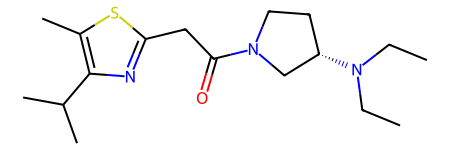

In [28]:
df_mB_temp['molecule'][1]

In [29]:
#df_mB.head(2)

In [30]:
# 1. canonicalize smiles from Molecule

In [31]:
df_canon = df_mB

In [32]:
df_canon['smiles'] = df_canon['molecule'].apply(Chem.MolToSmiles)

In [33]:
df_canon

,index,Id,smiles,sol_category,molecule
0,0,EOS12286,Cc1nc(N2CCN(C(=O)Nc3ccc(F)cc3F)CC2)cc(-n2ccnc2)n1,0,<rdkit.Chem.rdchem.Mol object at 0x17d518ba0>
1,1,EOS85869,CCN(CC)[C@H]1CCN(C(=O)Cc2nc(C(C)C)c(C)s2)C1,0,<rdkit.Chem.rdchem.Mol object at 0x17d518c80>
2,2,EOS85435,CNC(=O)CNC(=O)c1c(-n2cccc2)sc(C)c1C,0,<rdkit.Chem.rdchem.Mol object at 0x17d518cf0>
3,3,EOS102302,CC(C)(C)c1ccc(CSc2cnn(C(C)(C)C)c(=O)c2Cl)cc1,0,<rdkit.Chem.rdchem.Mol object at 0x17d518e40>
4,4,EOS64213,CC[C@H](NC(=O)c1ccnc(-n2ccnc2)c1)c1ccccc1OC,0,<rdkit.Chem.rdchem.Mol object at 0x17d518eb0>
5,5,EOS68602,Cn1c(SCC(=O)Nc2ccccc2F)nnc1-c1ccncc1,0,<rdkit.Chem.rdchem.Mol object at 0x17d518f20>
6,6,EOS90323,CCN(Cc1ccc2c(c1)OCO2)C(=O)C1=NN([C@H]2CCS(=O)(...,0,<rdkit.Chem.rdchem.Mol object at 0x17d518f90>
7,7,EOS4636,COc1ccc(CN2C[C@@H]3CC[C@H](C2)N(Cc2ccccc2)C3=O...,0,<rdkit.Chem.rdchem.Mol object at 0x17d529040>
8,8,EOS72860,C[C@@H]1Oc2ccc(NC(=O)COCc3nc4ccccc4s3)cc2NC1=O,0,<rdkit.Chem.rdchem.Mol object at 0x17d5290b0>
9,9,EOS18993,COc1cccc(-c2nc3n(c2C(=O)Nc2ccc4c(c2)OCO4)CCS3(...,0,<rdkit.Chem.rdchem.Mol object at 0x17d529120>


In [34]:
# 2. standardise molecules

In [35]:
df_standard = df_canon

In [36]:
# Standardazing Molecules
from rdkit.rdBase import BlockLogs
from rdkit import Chem
from rdkit.Chem.MolStandardize import rdMolStandardize
def transform(smiles, neutralize=True):
        mol = Chem.MolFromSmiles(smiles)
        block = BlockLogs() # Block all RDkit logging
        # Normalizing functional groups
        # https://molvs.readthedocs.io/en/latest/guide/standardize.html
        clean_mol = rdMolStandardize.Cleanup(mol) 
        # Get parents fragments
        parent_clean_mol = rdMolStandardize.FragmentParent(clean_mol)
        # Neutralise
        if neutralize:
            uncharger = rdMolStandardize.Uncharger()
            uncharged_parent_clean_mol = uncharger.uncharge(parent_clean_mol)
        else:
            uncharged_parent_clean_mol = parent_clean_mol
        del block # Release logging block to previous state
        return(uncharged_parent_clean_mol)

In [37]:
df_standard['molecule'] = df_standard['smiles'].apply(transform)

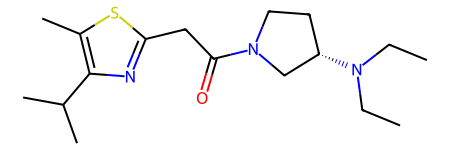

In [38]:
df_standard['molecule'][1]

In [39]:
# 3. extract MorganFP

In [40]:
#df_MFP_test = df_standard.head(5)

In [41]:
#df_MFP_test

In [42]:
df_part = df_standard
df_part

,index,Id,smiles,sol_category,molecule
0,0,EOS12286,Cc1nc(N2CCN(C(=O)Nc3ccc(F)cc3F)CC2)cc(-n2ccnc2)n1,0,<rdkit.Chem.rdchem.Mol object at 0x17d729f20>
1,1,EOS85869,CCN(CC)[C@H]1CCN(C(=O)Cc2nc(C(C)C)c(C)s2)C1,0,<rdkit.Chem.rdchem.Mol object at 0x17d729f90>
2,2,EOS85435,CNC(=O)CNC(=O)c1c(-n2cccc2)sc(C)c1C,0,<rdkit.Chem.rdchem.Mol object at 0x17d729eb0>
3,3,EOS102302,CC(C)(C)c1ccc(CSc2cnn(C(C)(C)C)c(=O)c2Cl)cc1,0,<rdkit.Chem.rdchem.Mol object at 0x17d74f040>
4,4,EOS64213,CC[C@H](NC(=O)c1ccnc(-n2ccnc2)c1)c1ccccc1OC,0,<rdkit.Chem.rdchem.Mol object at 0x17d74f0b0>
5,5,EOS68602,Cn1c(SCC(=O)Nc2ccccc2F)nnc1-c1ccncc1,0,<rdkit.Chem.rdchem.Mol object at 0x17d74f120>
6,6,EOS90323,CCN(Cc1ccc2c(c1)OCO2)C(=O)C1=NN([C@H]2CCS(=O)(...,0,<rdkit.Chem.rdchem.Mol object at 0x17d74f190>
7,7,EOS4636,COc1ccc(CN2C[C@@H]3CC[C@H](C2)N(Cc2ccccc2)C3=O...,0,<rdkit.Chem.rdchem.Mol object at 0x17d74f200>
8,8,EOS72860,C[C@@H]1Oc2ccc(NC(=O)COCc3nc4ccccc4s3)cc2NC1=O,0,<rdkit.Chem.rdchem.Mol object at 0x17d74f270>
9,9,EOS18993,COc1cccc(-c2nc3n(c2C(=O)Nc2ccc4c(c2)OCO4)CCS3(...,0,<rdkit.Chem.rdchem.Mol object at 0x17d74f2e0>


In [43]:
MFP_df = pd.DataFrame()
for mol in df_part['molecule']:
    MFP_vect = [AllChem.GetMorganFingerprintAsBitVect(mol, radius=2, nBits=4096)]
    MFP_list = [list(l) for l in MFP_vect]
    MFP_df = pd.concat([MFP_df,pd.DataFrame(MFP_list)])

In [44]:
MFP_df

,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
MFP_df = MFP_df.reset_index(drop=True)
MFP_df

,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
# Renaming

In [47]:
MFP_df = rename(MFP_df, 'ecfp_')
MFP_df

,ecfp_0,ecfp_1,ecfp_2,ecfp_3,ecfp_4,ecfp_5,ecfp_6,ecfp_7,ecfp_8,ecfp_9,...,ecfp_4086,ecfp_4087,ecfp_4088,ecfp_4089,ecfp_4090,ecfp_4091,ecfp_4092,ecfp_4093,ecfp_4094,ecfp_4095
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
df_wMFP = pd.concat([df_part, MFP_df], axis=1)
df_wMFP

,index,Id,smiles,sol_category,molecule,ecfp_0,ecfp_1,ecfp_2,ecfp_3,ecfp_4,...,ecfp_4086,ecfp_4087,ecfp_4088,ecfp_4089,ecfp_4090,ecfp_4091,ecfp_4092,ecfp_4093,ecfp_4094,ecfp_4095
0,0,EOS12286,Cc1nc(N2CCN(C(=O)Nc3ccc(F)cc3F)CC2)cc(-n2ccnc2)n1,0,<rdkit.Chem.rdchem.Mol object at 0x17d729f20>,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,EOS85869,CCN(CC)[C@H]1CCN(C(=O)Cc2nc(C(C)C)c(C)s2)C1,0,<rdkit.Chem.rdchem.Mol object at 0x17d729f90>,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,EOS85435,CNC(=O)CNC(=O)c1c(-n2cccc2)sc(C)c1C,0,<rdkit.Chem.rdchem.Mol object at 0x17d729eb0>,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,EOS102302,CC(C)(C)c1ccc(CSc2cnn(C(C)(C)C)c(=O)c2Cl)cc1,0,<rdkit.Chem.rdchem.Mol object at 0x17d74f040>,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,EOS64213,CC[C@H](NC(=O)c1ccnc(-n2ccnc2)c1)c1ccccc1OC,0,<rdkit.Chem.rdchem.Mol object at 0x17d74f0b0>,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,5,EOS68602,Cn1c(SCC(=O)Nc2ccccc2F)nnc1-c1ccncc1,0,<rdkit.Chem.rdchem.Mol object at 0x17d74f120>,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,6,EOS90323,CCN(Cc1ccc2c(c1)OCO2)C(=O)C1=NN([C@H]2CCS(=O)(...,0,<rdkit.Chem.rdchem.Mol object at 0x17d74f190>,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,7,EOS4636,COc1ccc(CN2C[C@@H]3CC[C@H](C2)N(Cc2ccccc2)C3=O...,0,<rdkit.Chem.rdchem.Mol object at 0x17d74f200>,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,8,EOS72860,C[C@@H]1Oc2ccc(NC(=O)COCc3nc4ccccc4s3)cc2NC1=O,0,<rdkit.Chem.rdchem.Mol object at 0x17d74f270>,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,9,EOS18993,COc1cccc(-c2nc3n(c2C(=O)Nc2ccc4c(c2)OCO4)CCS3(...,0,<rdkit.Chem.rdchem.Mol object at 0x17d74f2e0>,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
#df_wMFP = df_wMFP.drop(columns='MorganFP')
#df_wMFP

In [50]:
#MFP_df = pd.DataFrame(MFP_list)
#MFP_df.shape
#MFP_df

In [51]:
#df_MFP = df_standard

In [52]:
#def MFP_generator(mol):
#    MorganFP = AllChem.GetMorganFingerprintAsBitVect(mol, radius=2, nBits=4096)
#    return MorganFP

In [53]:
#df_MFP['MorganFP'] = df_MFP['molecule'].apply(MFP_generator)
#df_MFP['MorganFP'] = df_MFP['MorganFP'].apply(lambda x: np.reshape(x,(-1,1)))

In [54]:
#df_MFP

In [55]:
# 4. calculate rdkit descriptors

In [56]:
def rdkit_descriptor_calculator(df_in , add_logP = True, add_bpKa1 = True, add_bpKa2 = True):
    #'''
    #Calculates select RDKit descriptors for the molecules in the dataframe.
    #Raises error if no SMILES column in present in the query dataframe.
    #Parameters:
    #    1. df_in: query dataframe, where the SMILES column is expected to be present
    #    2. add_logP: boolean, if True, adds logP to the list of descriptors
    #    3. add_bpKa1: boolean, if True, adds bpKa1 to the list of descriptors
    #   4. add_bpKa2: boolean, if True, adds bpKa2 to the list of descriptors
    #Returns:
    #    1. df: Pandas DataFrame of the calculated descriptors
    #'''
    df_in = df_in.copy()
    #In past, I got NaNs with these descriptors, so I am not using them
    #not_used_desc = ['MaxPartialCharge', 'MinPartialCharge', 'MaxAbsPartialCharge', 'MinAbsPartialCharge','BCUT2D_MWHI',
    #'BCUT2D_MWLOW','BCUT2D_CHGHI','BCUT2D_CHGLO','BCUT2D_LOGPHI','BCUT2D_LOGPLOW','BCUT2D_MRHI','BCUT2D_MRLOW']
    #Appending 'MolLogP' because we already have calculated logP using ChemAxon Marvin, and 'Ipc' as its value is too high
    #not_used_desc.extend(['MolLogP', 'Ipc'])
    #used descriptors
    descriptors_list = [x for x in [x[0] for x in Chem.Descriptors.descList] ]# if x not in not_used_desc]
    # Create a descriptor calculator with select descriptors
    desc_calc = MolecularDescriptorCalculator(descriptors_list)
    #Lower case all the column names of the dataframe
    df_in.columns = df_in.columns.str.lower()
    #Checking whether the SMILES column is present in the dataframe
    if('smiles' not in df_in.columns):
        raise ValueError('SMILES column not present in the dataframe')
    #Checking whether the Molecules column is present in the dataframe, if not present, adding it
    if('molecule' not in df_in.columns):
        df_in['molecule'] = df_in['smiles'].apply(lambda x: Chem.MolFromSmiles(x))
    desc = []
    #Looping over the molecules
    #for mol in df_in['molecules']:
    #    desc.append(desc_calc.CalcDescriptors(mol))
    #df_desc = pd.DataFrame(desc, columns = descriptors_list)
    #Adding logP and bpKa1 and bpKa2 if required
    #if(add_logP):
    #    df_desc['logP'] = df_in['logp'].values
    #if(add_bpKa1):
    #    df_desc['bpKa1'] = df_in['bpka1'].values
    #if(add_bpKa2):
    #    df_desc['bpKa2'] = df_in['bpka2'].values
    #return df_desc

In [57]:
#df_desc = rdkit_descriptor_calculator(df_wMFP)
#df_desc

In [58]:
desc_name = list(Chem.rdMolDescriptors.Properties.GetAvailableProperties())
descriptors_list = [x for x in [x[0] for x in Chem.Descriptors.descList]]
#Chem.rdMolDescriptors.Properties(d)

In [59]:
[value for value in desc_name if value in descriptors_list]

['NumRotatableBonds',
 'NumHeteroatoms',
 'FractionCSP3',
 'NumAromaticRings',
 'NumAliphaticRings',
 'NumSaturatedRings',
 'NumAromaticHeterocycles',
 'NumSaturatedHeterocycles',
 'NumAliphaticHeterocycles']

In [60]:
descriptors_list

['MaxEStateIndex',
 'MinEStateIndex',
 'MaxAbsEStateIndex',
 'MinAbsEStateIndex',
 'qed',
 'MolWt',
 'HeavyAtomMolWt',
 'ExactMolWt',
 'NumValenceElectrons',
 'NumRadicalElectrons',
 'MaxPartialCharge',
 'MinPartialCharge',
 'MaxAbsPartialCharge',
 'MinAbsPartialCharge',
 'FpDensityMorgan1',
 'FpDensityMorgan2',
 'FpDensityMorgan3',
 'BCUT2D_MWHI',
 'BCUT2D_MWLOW',
 'BCUT2D_CHGHI',
 'BCUT2D_CHGLO',
 'BCUT2D_LOGPHI',
 'BCUT2D_LOGPLOW',
 'BCUT2D_MRHI',
 'BCUT2D_MRLOW',
 'BalabanJ',
 'BertzCT',
 'Chi0',
 'Chi0n',
 'Chi0v',
 'Chi1',
 'Chi1n',
 'Chi1v',
 'Chi2n',
 'Chi2v',
 'Chi3n',
 'Chi3v',
 'Chi4n',
 'Chi4v',
 'HallKierAlpha',
 'Ipc',
 'Kappa1',
 'Kappa2',
 'Kappa3',
 'LabuteASA',
 'PEOE_VSA1',
 'PEOE_VSA10',
 'PEOE_VSA11',
 'PEOE_VSA12',
 'PEOE_VSA13',
 'PEOE_VSA14',
 'PEOE_VSA2',
 'PEOE_VSA3',
 'PEOE_VSA4',
 'PEOE_VSA5',
 'PEOE_VSA6',
 'PEOE_VSA7',
 'PEOE_VSA8',
 'PEOE_VSA9',
 'SMR_VSA1',
 'SMR_VSA10',
 'SMR_VSA2',
 'SMR_VSA3',
 'SMR_VSA4',
 'SMR_VSA5',
 'SMR_VSA6',
 'SMR_VSA7',
 'SMR_

In [61]:
def desc_generator(mol):
    desc_list = []
    for i in range(len(Chem.Descriptors.descList)):
        desc_list.append(Chem.Descriptors.descList[i][1](mol))
    return desc_list

In [62]:
desc_df = pd.DataFrame()
for mol in df_wMFP['molecule']:
    desc_vect = [desc_generator(mol)]
    desc_list = [list(l) for l in desc_vect]
    desc_df = pd.concat([desc_df,pd.DataFrame(desc_list)])

In [63]:
desc_df

,0,1,2,3,4,5,6,7,8,9,...,198,199,200,201,202,203,204,205,206,207
0,13.751480,-0.805113,13.751480,0.046085,0.732517,399.405,380.253,399.161915,150,0,...,0,0,0,0,0,0,0,0,0,1
0,12.524029,0.234919,12.524029,0.234919,0.807124,323.506,294.274,323.203134,124,0,...,0,0,0,0,0,1,0,0,0,0
0,12.317465,-0.223009,12.317465,0.019061,0.899102,291.376,274.240,291.104148,106,0,...,0,0,0,0,0,0,0,1,0,0
0,12.357761,-0.382235,12.357761,0.149177,0.698158,364.942,339.742,364.137612,130,0,...,1,0,0,0,0,0,0,0,0,0
0,12.704152,-0.151369,12.704152,0.131009,0.750601,336.395,316.235,336.158626,128,0,...,0,0,0,0,0,0,0,0,0,0
0,13.515256,-0.463443,13.515256,0.107791,0.721314,343.387,329.275,343.090309,122,0,...,1,0,0,0,0,0,0,0,0,0
0,13.044894,-3.153283,13.044894,0.047069,0.700330,421.475,398.291,421.130756,156,0,...,0,0,1,0,0,0,0,0,0,0
0,12.989677,0.068803,12.989677,0.068803,0.883802,366.461,340.253,366.194343,142,0,...,0,0,0,0,0,0,0,0,0,0
0,12.087571,-0.533472,12.087571,0.090374,0.706352,383.429,366.293,383.093977,138,0,...,0,0,0,0,0,1,0,0,0,0
0,13.224656,-3.541277,13.224656,0.085290,0.680608,427.438,410.302,427.083806,154,0,...,0,0,1,0,0,0,0,0,0,0


In [64]:
desc_df = desc_df.reset_index(drop=True)
desc_df

,0,1,2,3,4,5,6,7,8,9,...,198,199,200,201,202,203,204,205,206,207
0,13.751480,-0.805113,13.751480,0.046085,0.732517,399.405,380.253,399.161915,150,0,...,0,0,0,0,0,0,0,0,0,1
1,12.524029,0.234919,12.524029,0.234919,0.807124,323.506,294.274,323.203134,124,0,...,0,0,0,0,0,1,0,0,0,0
2,12.317465,-0.223009,12.317465,0.019061,0.899102,291.376,274.240,291.104148,106,0,...,0,0,0,0,0,0,0,1,0,0
3,12.357761,-0.382235,12.357761,0.149177,0.698158,364.942,339.742,364.137612,130,0,...,1,0,0,0,0,0,0,0,0,0
4,12.704152,-0.151369,12.704152,0.131009,0.750601,336.395,316.235,336.158626,128,0,...,0,0,0,0,0,0,0,0,0,0
5,13.515256,-0.463443,13.515256,0.107791,0.721314,343.387,329.275,343.090309,122,0,...,1,0,0,0,0,0,0,0,0,0
6,13.044894,-3.153283,13.044894,0.047069,0.700330,421.475,398.291,421.130756,156,0,...,0,0,1,0,0,0,0,0,0,0
7,12.989677,0.068803,12.989677,0.068803,0.883802,366.461,340.253,366.194343,142,0,...,0,0,0,0,0,0,0,0,0,0
8,12.087571,-0.533472,12.087571,0.090374,0.706352,383.429,366.293,383.093977,138,0,...,0,0,0,0,0,1,0,0,0,0
9,13.224656,-3.541277,13.224656,0.085290,0.680608,427.438,410.302,427.083806,154,0,...,0,0,1,0,0,0,0,0,0,0


In [65]:
desc_df = rename(desc_df, 'rdkit_desc_')
desc_df

,rdkit_desc_0,rdkit_desc_1,rdkit_desc_2,rdkit_desc_3,rdkit_desc_4,rdkit_desc_5,rdkit_desc_6,rdkit_desc_7,rdkit_desc_8,rdkit_desc_9,...,rdkit_desc_198,rdkit_desc_199,rdkit_desc_200,rdkit_desc_201,rdkit_desc_202,rdkit_desc_203,rdkit_desc_204,rdkit_desc_205,rdkit_desc_206,rdkit_desc_207
0,13.751480,-0.805113,13.751480,0.046085,0.732517,399.405,380.253,399.161915,150,0,...,0,0,0,0,0,0,0,0,0,1
1,12.524029,0.234919,12.524029,0.234919,0.807124,323.506,294.274,323.203134,124,0,...,0,0,0,0,0,1,0,0,0,0
2,12.317465,-0.223009,12.317465,0.019061,0.899102,291.376,274.240,291.104148,106,0,...,0,0,0,0,0,0,0,1,0,0
3,12.357761,-0.382235,12.357761,0.149177,0.698158,364.942,339.742,364.137612,130,0,...,1,0,0,0,0,0,0,0,0,0
4,12.704152,-0.151369,12.704152,0.131009,0.750601,336.395,316.235,336.158626,128,0,...,0,0,0,0,0,0,0,0,0,0
5,13.515256,-0.463443,13.515256,0.107791,0.721314,343.387,329.275,343.090309,122,0,...,1,0,0,0,0,0,0,0,0,0
6,13.044894,-3.153283,13.044894,0.047069,0.700330,421.475,398.291,421.130756,156,0,...,0,0,1,0,0,0,0,0,0,0
7,12.989677,0.068803,12.989677,0.068803,0.883802,366.461,340.253,366.194343,142,0,...,0,0,0,0,0,0,0,0,0,0
8,12.087571,-0.533472,12.087571,0.090374,0.706352,383.429,366.293,383.093977,138,0,...,0,0,0,0,0,1,0,0,0,0
9,13.224656,-3.541277,13.224656,0.085290,0.680608,427.438,410.302,427.083806,154,0,...,0,0,1,0,0,0,0,0,0,0


In [66]:
df_AllData = pd.concat([df_wMFP, desc_df], axis=1)
df_AllData

,index,Id,smiles,sol_category,molecule,ecfp_0,ecfp_1,ecfp_2,ecfp_3,ecfp_4,...,rdkit_desc_198,rdkit_desc_199,rdkit_desc_200,rdkit_desc_201,rdkit_desc_202,rdkit_desc_203,rdkit_desc_204,rdkit_desc_205,rdkit_desc_206,rdkit_desc_207
0,0,EOS12286,Cc1nc(N2CCN(C(=O)Nc3ccc(F)cc3F)CC2)cc(-n2ccnc2)n1,0,<rdkit.Chem.rdchem.Mol object at 0x17d729f20>,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,EOS85869,CCN(CC)[C@H]1CCN(C(=O)Cc2nc(C(C)C)c(C)s2)C1,0,<rdkit.Chem.rdchem.Mol object at 0x17d729f90>,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,2,EOS85435,CNC(=O)CNC(=O)c1c(-n2cccc2)sc(C)c1C,0,<rdkit.Chem.rdchem.Mol object at 0x17d729eb0>,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,3,EOS102302,CC(C)(C)c1ccc(CSc2cnn(C(C)(C)C)c(=O)c2Cl)cc1,0,<rdkit.Chem.rdchem.Mol object at 0x17d74f040>,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,4,EOS64213,CC[C@H](NC(=O)c1ccnc(-n2ccnc2)c1)c1ccccc1OC,0,<rdkit.Chem.rdchem.Mol object at 0x17d74f0b0>,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,5,EOS68602,Cn1c(SCC(=O)Nc2ccccc2F)nnc1-c1ccncc1,0,<rdkit.Chem.rdchem.Mol object at 0x17d74f120>,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
6,6,EOS90323,CCN(Cc1ccc2c(c1)OCO2)C(=O)C1=NN([C@H]2CCS(=O)(...,0,<rdkit.Chem.rdchem.Mol object at 0x17d74f190>,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
7,7,EOS4636,COc1ccc(CN2C[C@@H]3CC[C@H](C2)N(Cc2ccccc2)C3=O...,0,<rdkit.Chem.rdchem.Mol object at 0x17d74f200>,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,8,EOS72860,C[C@@H]1Oc2ccc(NC(=O)COCc3nc4ccccc4s3)cc2NC1=O,0,<rdkit.Chem.rdchem.Mol object at 0x17d74f270>,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9,9,EOS18993,COc1cccc(-c2nc3n(c2C(=O)Nc2ccc4c(c2)OCO4)CCS3(...,0,<rdkit.Chem.rdchem.Mol object at 0x17d74f2e0>,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [67]:
df_train_set = pd.DataFrame()
df_test_set = pd.DataFrame()

df_train_set = df_AllData[df_AllData['sol_category'] <= 5]
df_test_set = df_AllData[df_AllData['sol_category'] == 5]

In [68]:
print('df_train_set')
df_train_set.drop(columns='sol_category', inplace=True)
df_train_set

df_train_set


,index,Id,smiles,molecule,ecfp_0,ecfp_1,ecfp_2,ecfp_3,ecfp_4,ecfp_5,...,rdkit_desc_198,rdkit_desc_199,rdkit_desc_200,rdkit_desc_201,rdkit_desc_202,rdkit_desc_203,rdkit_desc_204,rdkit_desc_205,rdkit_desc_206,rdkit_desc_207
0,0,EOS12286,Cc1nc(N2CCN(C(=O)Nc3ccc(F)cc3F)CC2)cc(-n2ccnc2)n1,<rdkit.Chem.rdchem.Mol object at 0x17d729f20>,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,EOS85869,CCN(CC)[C@H]1CCN(C(=O)Cc2nc(C(C)C)c(C)s2)C1,<rdkit.Chem.rdchem.Mol object at 0x17d729f90>,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,2,EOS85435,CNC(=O)CNC(=O)c1c(-n2cccc2)sc(C)c1C,<rdkit.Chem.rdchem.Mol object at 0x17d729eb0>,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,3,EOS102302,CC(C)(C)c1ccc(CSc2cnn(C(C)(C)C)c(=O)c2Cl)cc1,<rdkit.Chem.rdchem.Mol object at 0x17d74f040>,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,4,EOS64213,CC[C@H](NC(=O)c1ccnc(-n2ccnc2)c1)c1ccccc1OC,<rdkit.Chem.rdchem.Mol object at 0x17d74f0b0>,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,5,EOS68602,Cn1c(SCC(=O)Nc2ccccc2F)nnc1-c1ccncc1,<rdkit.Chem.rdchem.Mol object at 0x17d74f120>,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
6,6,EOS90323,CCN(Cc1ccc2c(c1)OCO2)C(=O)C1=NN([C@H]2CCS(=O)(...,<rdkit.Chem.rdchem.Mol object at 0x17d74f190>,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
7,7,EOS4636,COc1ccc(CN2C[C@@H]3CC[C@H](C2)N(Cc2ccccc2)C3=O...,<rdkit.Chem.rdchem.Mol object at 0x17d74f200>,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8,8,EOS72860,C[C@@H]1Oc2ccc(NC(=O)COCc3nc4ccccc4s3)cc2NC1=O,<rdkit.Chem.rdchem.Mol object at 0x17d74f270>,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9,9,EOS18993,COc1cccc(-c2nc3n(c2C(=O)Nc2ccc4c(c2)OCO4)CCS3(...,<rdkit.Chem.rdchem.Mol object at 0x17d74f2e0>,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [69]:
print('df_test_set')
df_test_set.drop(columns='sol_category', inplace=True)
df_test_set

df_test_set


/var/folders/bh/s4tpllbx26b8j4m3578sct1xf34l_t/T/ipykernel_5055/2478146384.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_set.drop(columns='sol_category', inplace=True)


,index,Id,smiles,molecule,ecfp_0,ecfp_1,ecfp_2,ecfp_3,ecfp_4,ecfp_5,...,rdkit_desc_198,rdkit_desc_199,rdkit_desc_200,rdkit_desc_201,rdkit_desc_202,rdkit_desc_203,rdkit_desc_204,rdkit_desc_205,rdkit_desc_206,rdkit_desc_207


In [70]:
df_train_set.to_csv('df_train_set10.csv', index=False)
df_test_set.to_csv('df_test_set10.csv', index=False)

In [71]:
df_train_read = pd.read_csv("df_train_set10.csv")
df_train_read

,index,Id,smiles,molecule,ecfp_0,ecfp_1,ecfp_2,ecfp_3,ecfp_4,ecfp_5,...,rdkit_desc_198,rdkit_desc_199,rdkit_desc_200,rdkit_desc_201,rdkit_desc_202,rdkit_desc_203,rdkit_desc_204,rdkit_desc_205,rdkit_desc_206,rdkit_desc_207
0,0,EOS12286,Cc1nc(N2CCN(C(=O)Nc3ccc(F)cc3F)CC2)cc(-n2ccnc2)n1,<rdkit.Chem.rdchem.Mol object at 0x17d729f20>,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,EOS85869,CCN(CC)[C@H]1CCN(C(=O)Cc2nc(C(C)C)c(C)s2)C1,<rdkit.Chem.rdchem.Mol object at 0x17d729f90>,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,2,EOS85435,CNC(=O)CNC(=O)c1c(-n2cccc2)sc(C)c1C,<rdkit.Chem.rdchem.Mol object at 0x17d729eb0>,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,3,EOS102302,CC(C)(C)c1ccc(CSc2cnn(C(C)(C)C)c(=O)c2Cl)cc1,<rdkit.Chem.rdchem.Mol object at 0x17d74f040>,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,4,EOS64213,CC[C@H](NC(=O)c1ccnc(-n2ccnc2)c1)c1ccccc1OC,<rdkit.Chem.rdchem.Mol object at 0x17d74f0b0>,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,5,EOS68602,Cn1c(SCC(=O)Nc2ccccc2F)nnc1-c1ccncc1,<rdkit.Chem.rdchem.Mol object at 0x17d74f120>,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
6,6,EOS90323,CCN(Cc1ccc2c(c1)OCO2)C(=O)C1=NN([C@H]2CCS(=O)(...,<rdkit.Chem.rdchem.Mol object at 0x17d74f190>,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
7,7,EOS4636,COc1ccc(CN2C[C@@H]3CC[C@H](C2)N(Cc2ccccc2)C3=O...,<rdkit.Chem.rdchem.Mol object at 0x17d74f200>,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8,8,EOS72860,C[C@@H]1Oc2ccc(NC(=O)COCc3nc4ccccc4s3)cc2NC1=O,<rdkit.Chem.rdchem.Mol object at 0x17d74f270>,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9,9,EOS18993,COc1cccc(-c2nc3n(c2C(=O)Nc2ccc4c(c2)OCO4)CCS3(...,<rdkit.Chem.rdchem.Mol object at 0x17d74f2e0>,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [72]:
df_test_read = pd.read_csv("df_test_set10.csv")
df_test_read

,index,Id,smiles,molecule,ecfp_0,ecfp_1,ecfp_2,ecfp_3,ecfp_4,ecfp_5,...,rdkit_desc_198,rdkit_desc_199,rdkit_desc_200,rdkit_desc_201,rdkit_desc_202,rdkit_desc_203,rdkit_desc_204,rdkit_desc_205,rdkit_desc_206,rdkit_desc_207
